In [1]:
# Import libraries
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import missingno as msno # missing data - data visualization
from collections import Counter #counting

In [2]:
# load the dataset- Excel file was converted to csv before uploading
df = pd.read_excel('Sterling_ECommerce_Data.xlsx')

In [3]:
# print the top rows
df.head() #by default give you top 5 rows

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [4]:
# Dimensionality of the data - The number of rows and columns
df.shape

(283083, 19)

In [5]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [6]:
# Investigate the dataset for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [9]:
# Convert Total to Integer value
df['Total'] = df['Total'].astype(int)

In [12]:
# Investigate the dataset for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [13]:
# Investigate the missing data
null_vals = df.isnull().sum()
null_vals

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [14]:
# Display where the missing data exist in the data
df[df.isnull().any(axis=1)]

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
38758,Soghaat,Leiters Ford,Fulton,111867,2010-11-04,2022-08-04,"Wright, Man",M,879766,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,2,36
38759,Soghaat,Leiters Ford,Fulton,111867,2010-11-04,2022-08-04,"Wright, Man",M,879765,NaN,cod,Leiters Ford,939999,Midwest,IN,mewright,46945,3,45
133217,Mobiles & Tablets,Rock Point,Charles,92075,2014-04-08,2022-04-01,"Torkelson, Berneice",F,767619,NaN,cod,Rock Point,715389,South,MD,bttorkelson,20682,2,2919
145889,Mobiles & Tablets,Uniopolis,Auglaize,111166,2017-02-23,2022-07-21,"Cannon, Shamika",F,872703,NaN,cod,Uniopolis,406105,Midwest,OH,svcannon,45888,2,578
224999,Computing,Barrington,Camden,40853,2009-08-24,2022-08-12,"Robichaux, Marion",M,883358,NaN,cod,Barrington,986961,Northeast,NJ,mjrobichaux,8007,2,39


In [15]:
# Drop the missing data, seeing as they are only 5 which is less than 1% of the data set and wont affect our reading

df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [17]:
# Dimensionality of the data - The number of rows and columns
df.shape

(283078, 19)

In [18]:
#Datatime Analysis
df.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74


In [19]:
# convert the date column into a pandas datetime object
df["Date of Order"] = pd.to_datetime(df["Date of Order"])
# Extract the year, month, quarter
df['Order_year'] = df["Date of Order"].dt.year
df['Order_month'] = df["Date of Order"].dt.month
df['Order_month_name'] = df["Date of Order"].dt.month_name()
df['Order_quarter'] = df["Date of Order"].dt.quarter
df.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Region,State,User Name,Zip,Qty Ordered,Total,Order_year,Order_month,Order_month_name,Order_quarter
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,Midwest,IA,mcrenaud,50519,3,32,2022,8,August,3
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,Midwest,IL,mgshimp,62223,2,74,2022,8,August,3


In [20]:
# convert the date column into a pandas datetime object
df["Customer Since"] = pd.to_datetime(df["Customer Since"])
# Extract the year, month, quarter
df['Inception_year'] = df["Customer Since"].dt.year
df['Inception_month'] = df["Customer Since"].dt.month
df['Inception_month_name'] = df["Customer Since"].dt.month_name()
df['Inception_quarter'] = df["Customer Since"].dt.quarter
df.head(2)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Qty Ordered,Total,Order_year,Order_month,Order_month_name,Order_quarter,Inception_year,Inception_month,Inception_month_name,Inception_quarter
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,3,32,2022,8,August,3,2008,2,February,1
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,2,74,2022,8,August,3,2005,6,June,2


In [21]:
# Dimensionality of the data - The number of rows and columns
df.shape

(283078, 27)

In [22]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total', 'Order_year', 'Order_month',
       'Order_month_name', 'Order_quarter', 'Inception_year',
       'Inception_month', 'Inception_month_name', 'Inception_quarter'],
      dtype='object')

In [23]:
# Convert the US state abbreavation on the dataframe to the full state name

import us

# Create a new column 'State_full' with the full state names
df['State_full'] = df['State'].apply(lambda x: us.states.lookup(x).name if us.states.lookup(x) else x)

In [24]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total', 'Order_year', 'Order_month',
       'Order_month_name', 'Order_quarter', 'Inception_year',
       'Inception_month', 'Inception_month_name', 'Inception_quarter',
       'State_full'],
      dtype='object')

In [25]:
df.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Total,Order_year,Order_month,Order_month_name,Order_quarter,Inception_year,Inception_month,Inception_month_name,Inception_quarter,State_full
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,32,2022,8,August,3,2008,2,February,1,Iowa
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,74,2022,8,August,3,2005,6,June,2,Illinois
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,74,2022,8,August,3,2005,6,June,2,Illinois
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,...,6822,2022,8,August,3,2013,9,September,3,Minnesota
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,...,2849,2022,8,August,3,2013,9,September,3,Minnesota


## Univariate Analysis
### Categorical Data Visualization

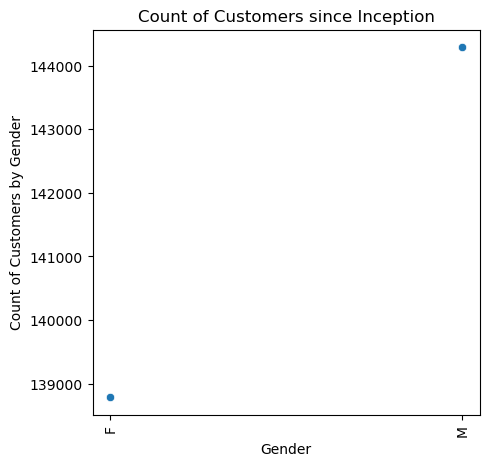

In [312]:
# Count of Gender
fig, ax = plt.subplots(figsize=(5, 5))
payment_method_region = df.groupby('Gender')['Inception_month'].count().reset_index()
sns.scatterplot(x='Gender', y='Inception_month', data=payment_method_region, ax=ax)
ax.set_title('Count of Customers since Inception')
ax.set_xlabel('Gender')
ax.set_ylabel('Count of Customers by Gender')
plt.xticks(rotation=90)
plt.show()

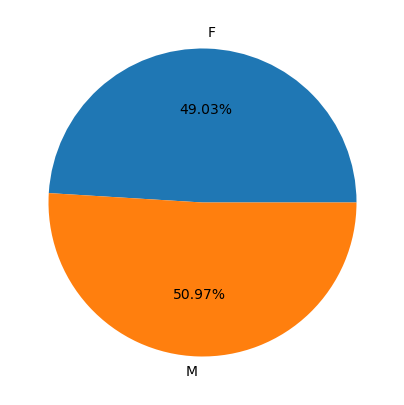

In [253]:
# Percentage of number of transactions by customer geneder

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.show();

### From this finding, we can see that Sterling E-commerce has more transactions coming in from their male customers compared to the female customers

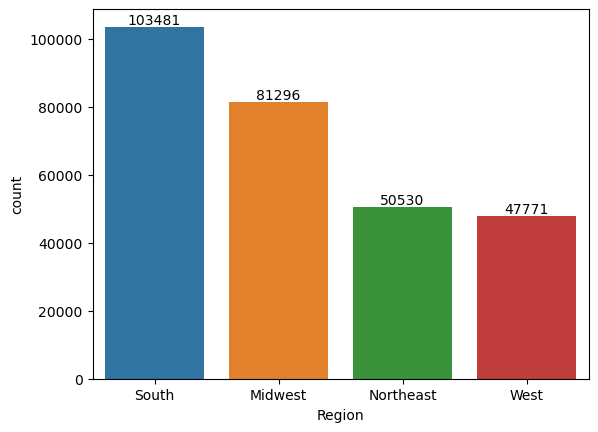

In [285]:
# Region- Region with highest number of purchases/sales
ax = sns.countplot(x=df["Region"], order=df["Region"].value_counts(ascending=False).index)
values = df["Region"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### From this visualization, we can see that most of the sales comes from the south region while the west region has the lowest sales

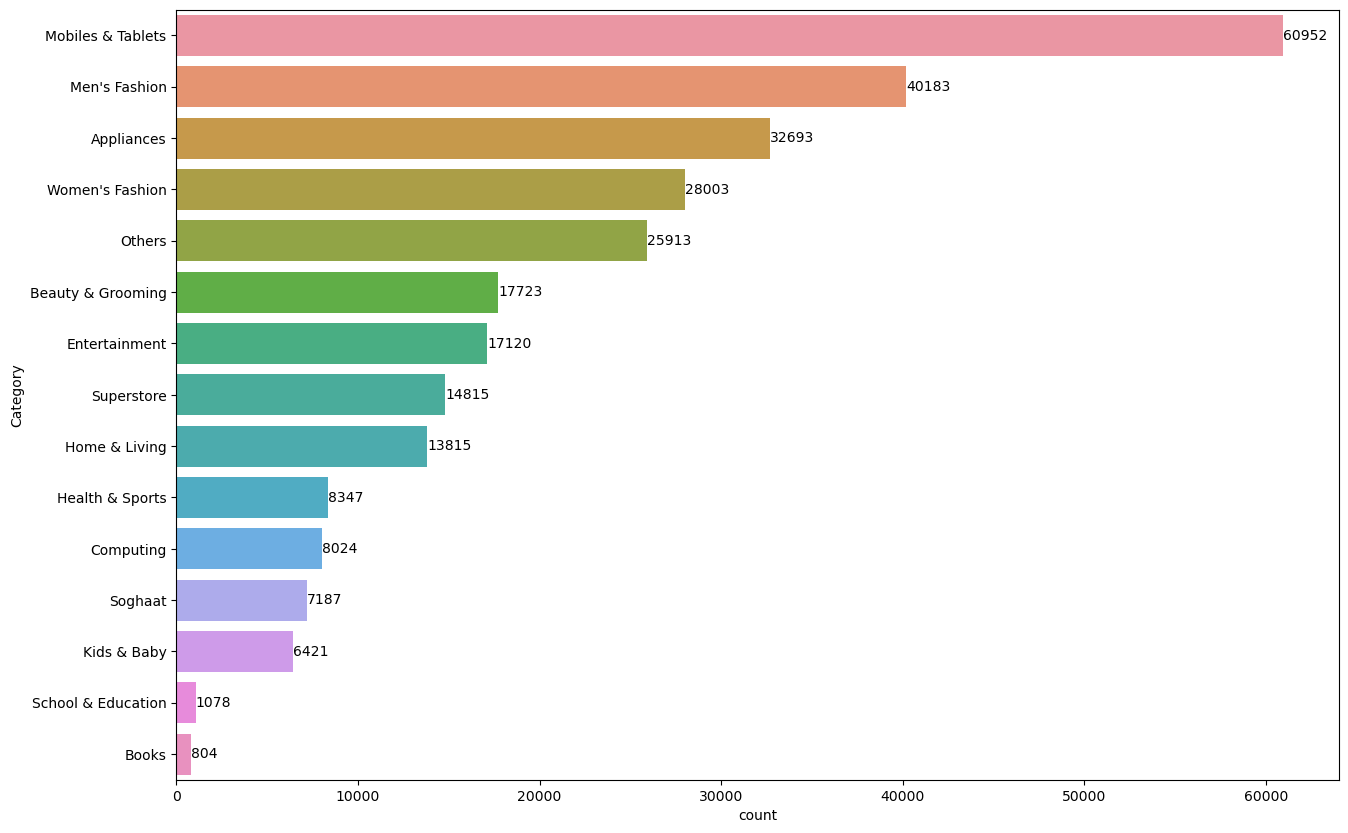

In [82]:
# Count of customers based on category
plt.figure(figsize=(15,10))

ax = sns.countplot(y=df["Category"], order=df["Category"].value_counts(ascending=False).index)
values = df["Category"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);


### From this visualization we can see that the category with the highest purchase is mobiles and tablets and the least purchased are books

Texas           17510
California      17130
New York        15567
Pennsylvania    14394
Illinois        12628
Florida         10538
Ohio            10203
Missouri         8876
Virginia         8557
Iowa             8170
Name: State_full, dtype: int64


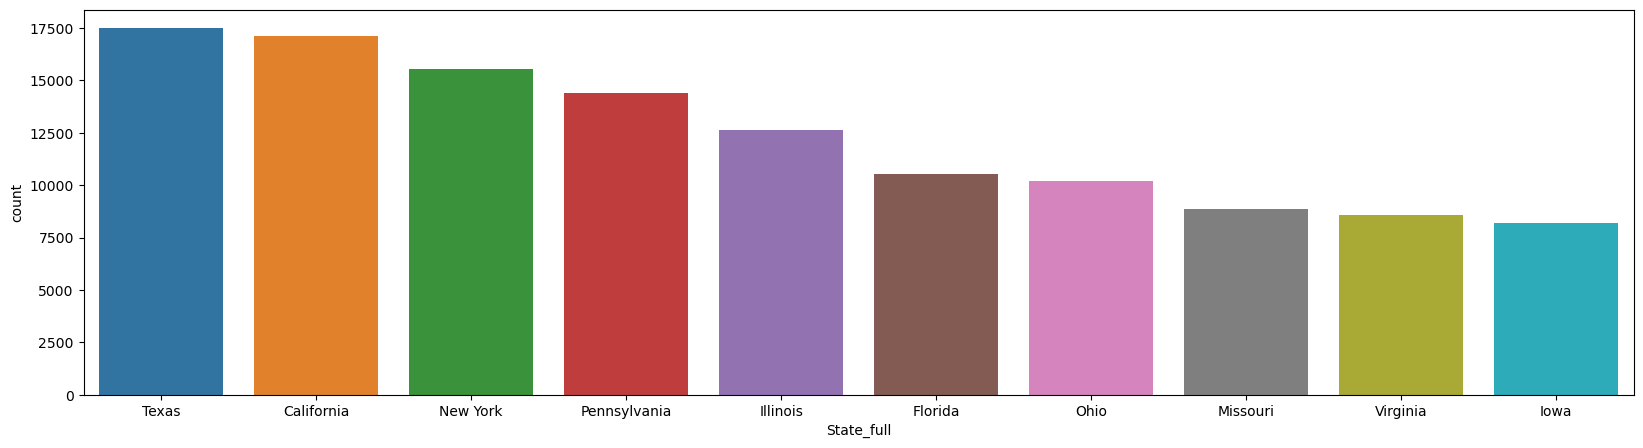

In [92]:
# Top 10 Transactions by state

plt.figure(figsize=(20,5))

topten = df["State_full"].value_counts().head(10)

sns.countplot(x="State_full", data=df, order=topten.index);
print(topten)






### From this analysis using just the top 10 transactions, Texas has the highest number of customers

December     81607
April        41692
March        26608
June         26532
November     17086
January      17038
July         15153
May          14684
September    12288
August       11291
February      9991
October       9108
Name: Order_month_name, dtype: int64


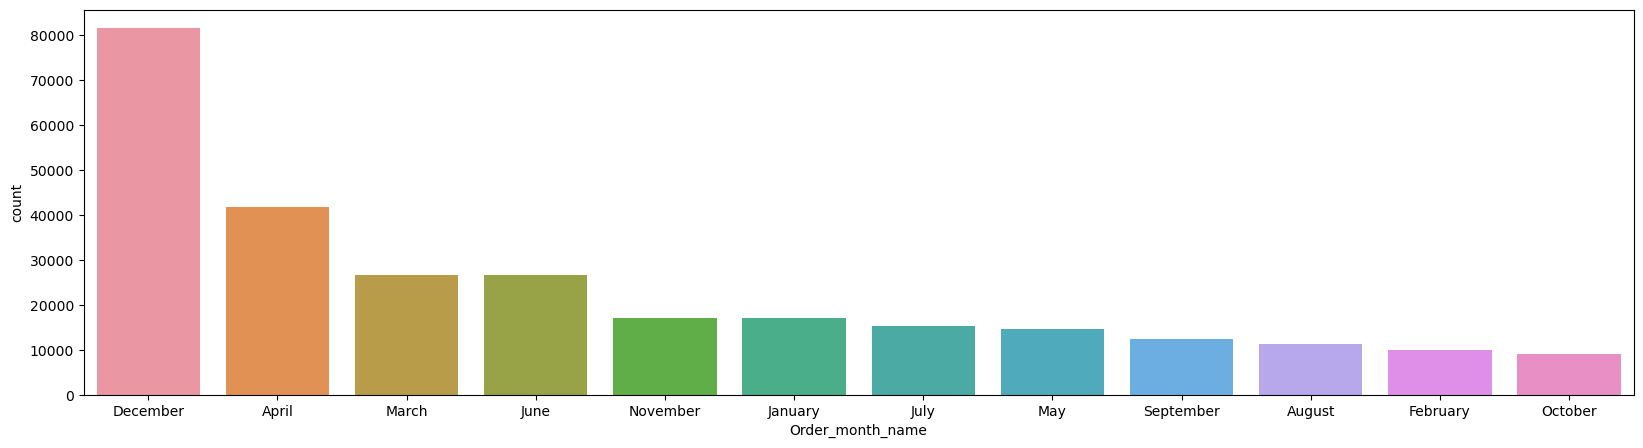

In [326]:
# Customer count by month of inception

plt.figure(figsize=(20,5))

topten = df["Order_month_name"].value_counts().head(12)

sns.countplot(x="Order_month_name", data=df, order=topten.index);
print(topten)

### From the visualization, we can see that from inception till date, December has the highest sign up

cod                101745
Easypay             68915
Payaxis             30657
easypay_voucher     29397
bankalfalah         22697
Name: Payment Method, dtype: int64


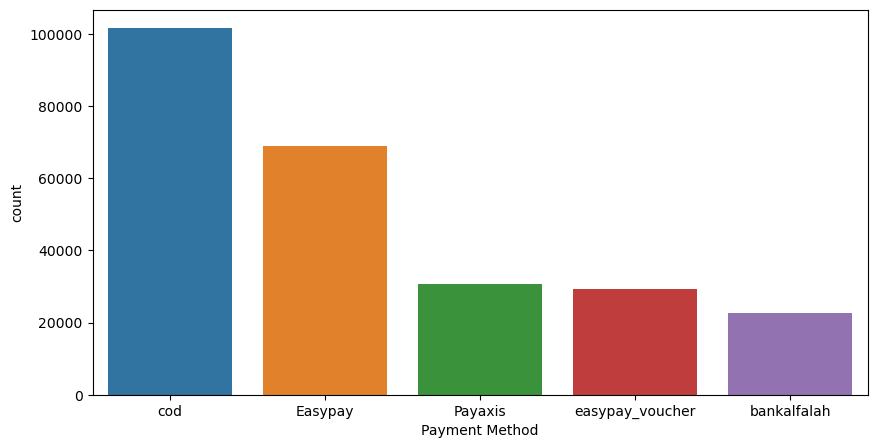

In [267]:
# Top 10 payment method

plt.figure(figsize=(10,5))

topfive = df["Payment Method"].value_counts().head(5)

sns.countplot(x="Payment Method", data=df, order=topfive.index);
print(topfive)

### From our observation, COD and Easypay are the top two payment method

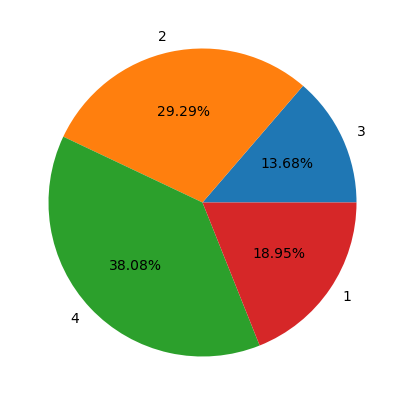

In [39]:
# Percentage of transactions by Quarter

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Order_quarter"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.show();

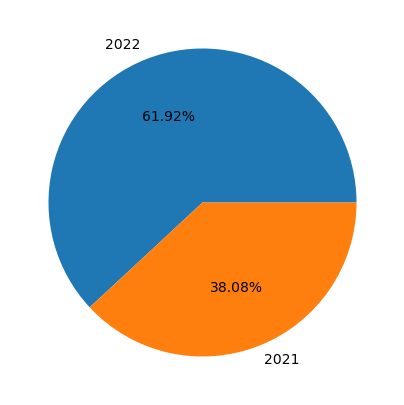

In [245]:
# Percentage of transactions by Year

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Order_year"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.show();

### From this observation, 2022 generated more revenue at 61.92% when compared with 2021

### From our observation, Q4 has the highest number of transactions

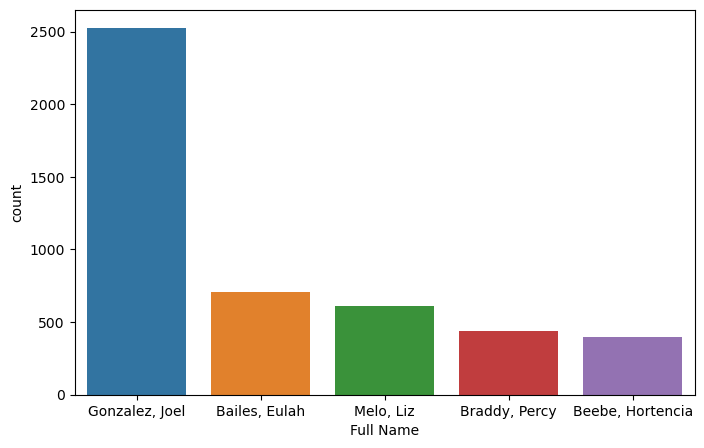

In [272]:
# Top 5 order count by customers

plt.figure(figsize=(8,5))

topten = df["Full Name"].value_counts().head(5)

sns.countplot(x="Full Name", data=df, order=topten.index);

### From this analysis, Gonzalez Joel, is ranked as the number one customer with the most transactions


### Bivariate Analysis
1. Total transaction spend by region
2. Total transaction spend by top 10 payment method
3. Total transaction spend by gender
4. Total transaction spend by month
5. Total transaction spend by top 10 state

In [104]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total', 'Order_year', 'Order_month',
       'Order_month_name', 'Order_quarter', 'Inception_year',
       'Inception_month', 'Inception_month_name', 'Inception_quarter',
       'State_full'],
      dtype='object')

In [55]:
reg_trans = df.groupby("Region")["Total"].sum().reset_index()
reg_trans

,Region,Total
0,Midwest,62888387
1,Northeast,39944369
2,South,89604180
3,West,38509679


In [57]:

cat_tran = df.groupby("Category")["Total"].sum().reset_index()
cat_tran

,Category,Total
0,Appliances,29793280
1,Beauty & Grooming,2610490
2,Books,32078
3,Computing,9287869
4,Entertainment,26758224
5,Health & Sports,1010357
6,Home & Living,1784384
7,Kids & Baby,845707
8,Men's Fashion,4739734
9,Mobiles & Tablets,128571001


''

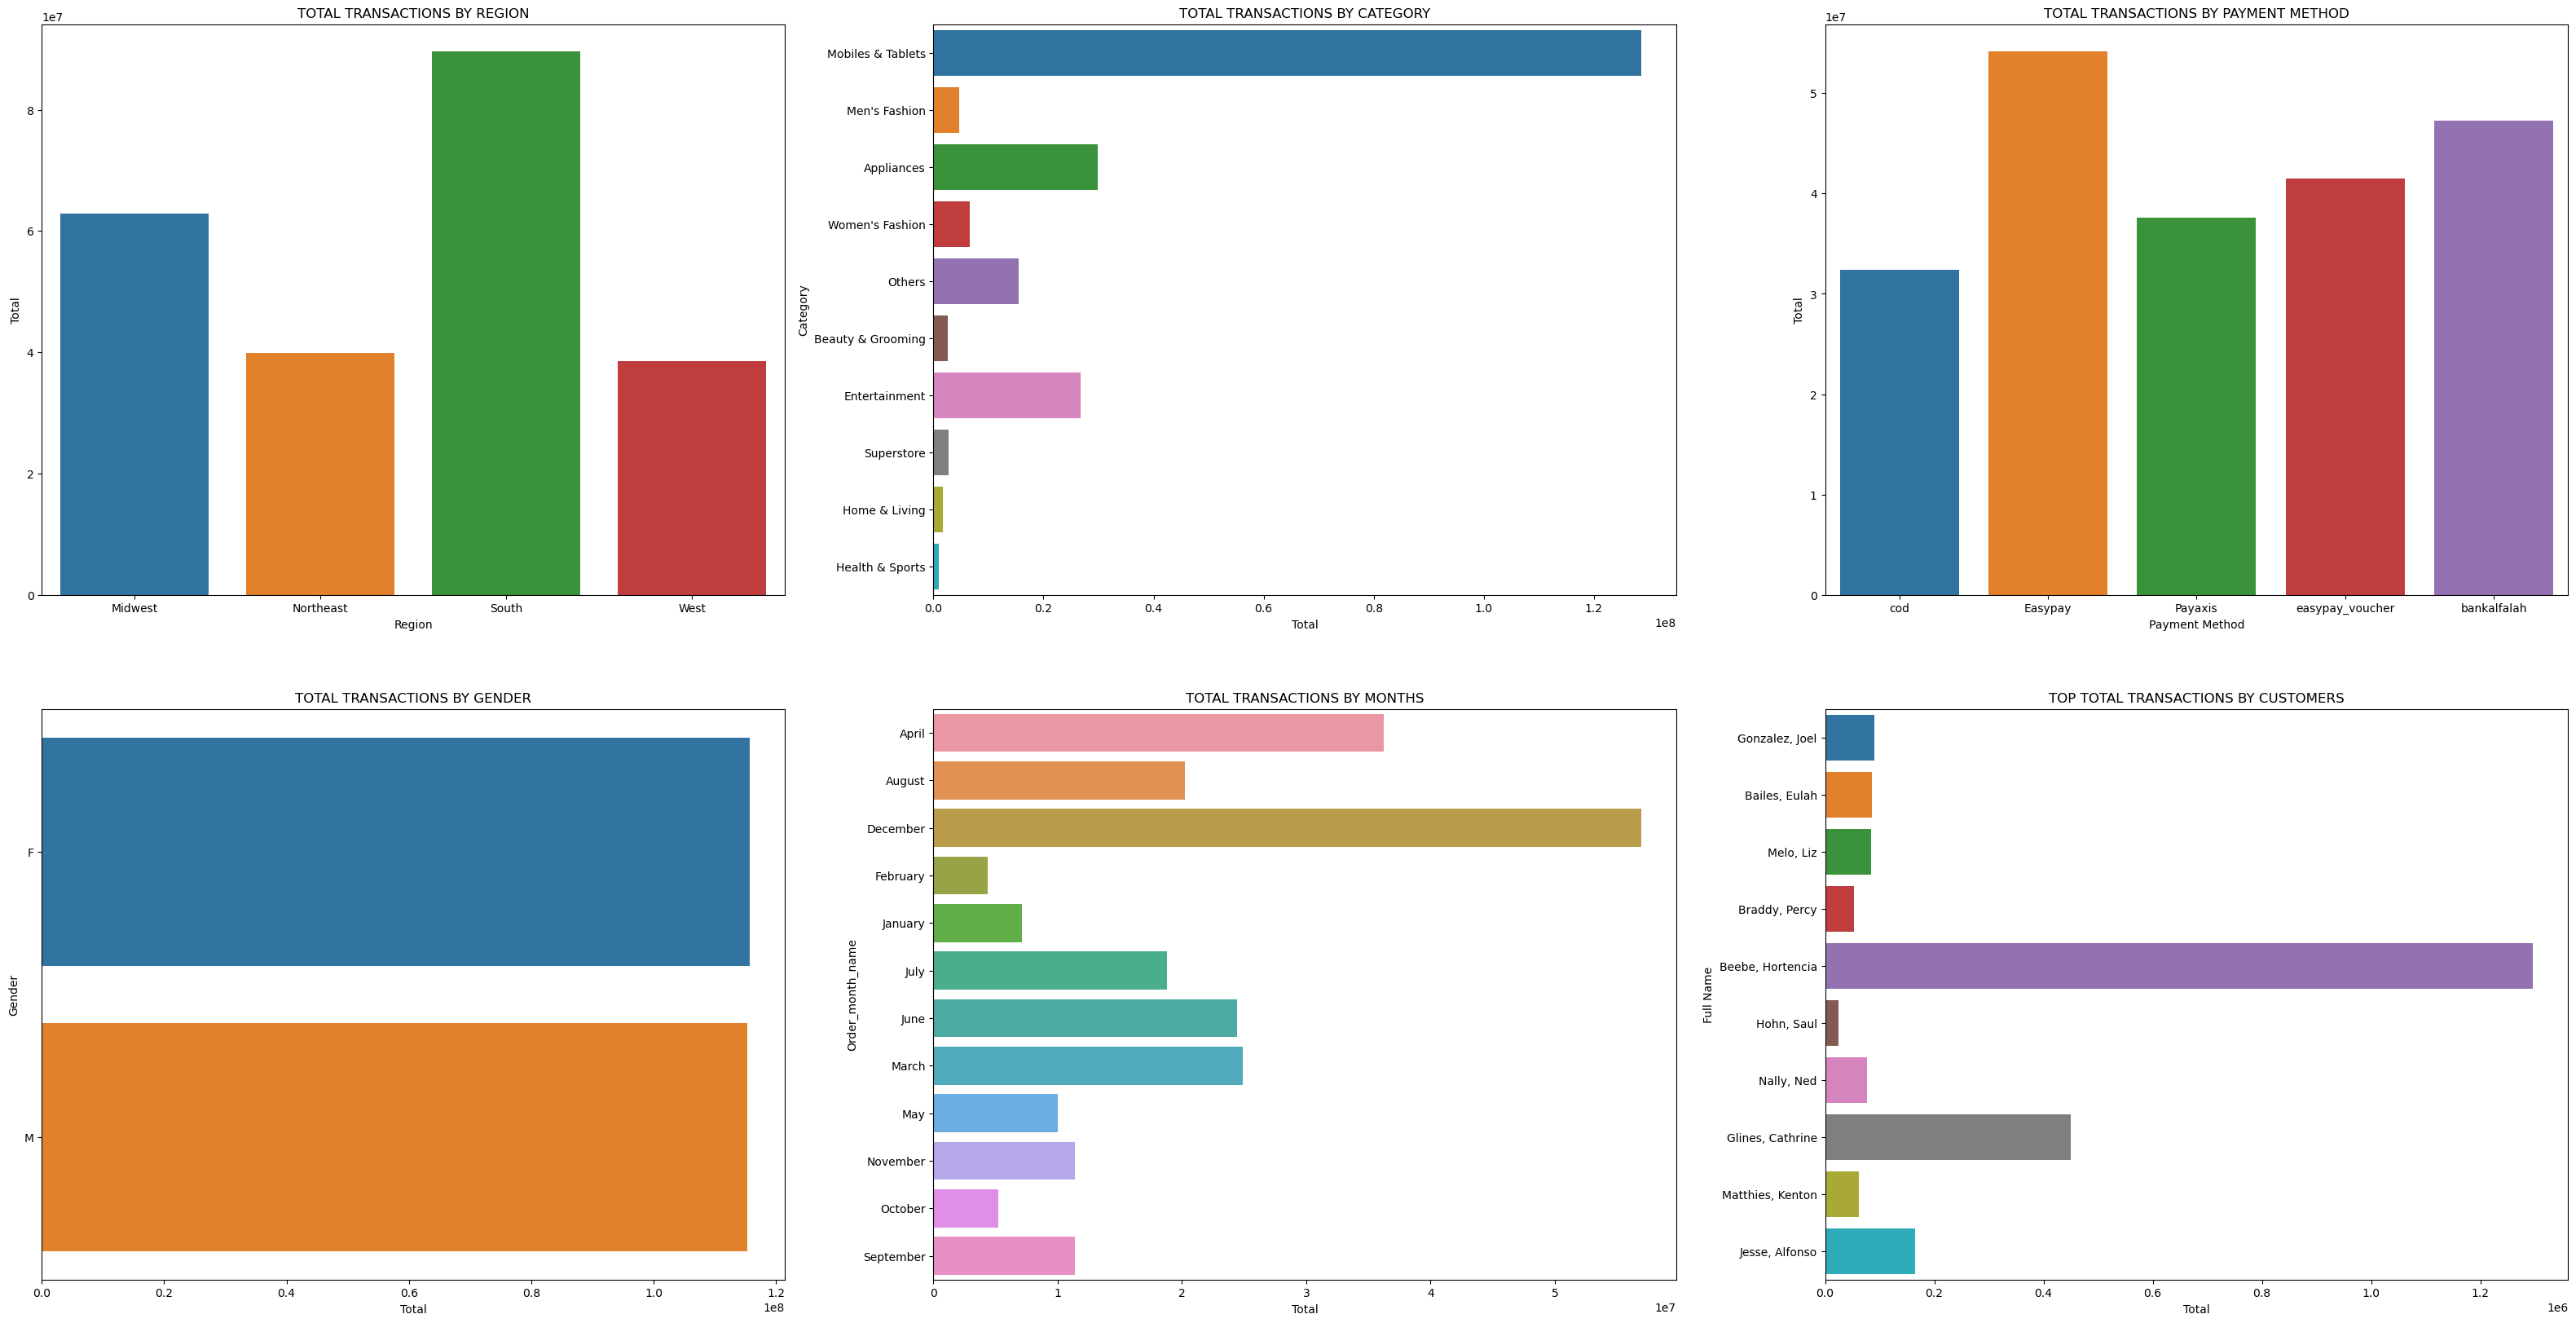

In [345]:
# Categorical columns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(40,20))

regional_tran = df.groupby("Region")["Total"].sum().reset_index()
sns.barplot(x='Region', data=regional_tran, y='Total', ax=axs[0,0])
axs[0,0].set_title("TOTAL TRANSACTIONS BY REGION")

topfive = df["Category"].value_counts().head(10)
category_tran = df.groupby("Category")["Total"].sum().reset_index()
sns.barplot(y='Category', data=category_tran, x='Total', order=topfive.index, ax=axs[0,1])
axs[0,1].set_title("TOTAL TRANSACTIONS BY CATEGORY")

toppay = df["Payment Method"].value_counts().head(5)
payment_method = df.groupby("Payment Method")["Total"].sum().reset_index()
sns.barplot(x='Payment Method', data=payment_method, y='Total', order=toppay.index, ax=axs[0,2])
axs[0,2].set_title("TOTAL TRANSACTIONS BY PAYMENT METHOD")

gender_tran = df.groupby("Gender")["Total"].sum().reset_index()
sns.barplot(y='Gender', data=gender_tran, x='Total', ax=axs[1,0])
axs[1,0].set_title("TOTAL TRANSACTIONS BY GENDER")

month_tran = df.groupby("Order_month_name")["Total"].sum().reset_index()
sns.barplot(y='Order_month_name', data=month_tran, x='Total', ax=axs[1,1])
axs[1,1].set_title("TOTAL TRANSACTIONS BY MONTHS")

topstates = df["Full Name"].value_counts().head(10)
state_tran = df.groupby("Full Name")["Total"].sum().reset_index()
sns.barplot(y='Full Name', data=state_tran, x='Total', order=topstates.index, ax=axs[1,2])
axs[1,2].set_title("TOP TOTAL TRANSACTIONS BY CUSTOMERS")

;

/var/folders/wb/r5q3hp9s1c98mfdj1r23qcz40000gn/T/ipykernel_72647/3341240078.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Order_month']);


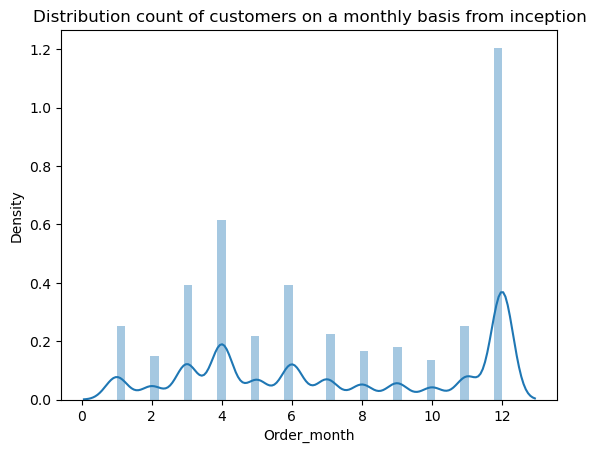

In [301]:
# distriution of productS ordered across the year
plt.title('Distribution count of customers on a monthly basis from inception')
sns.distplot(df['Order_month']);

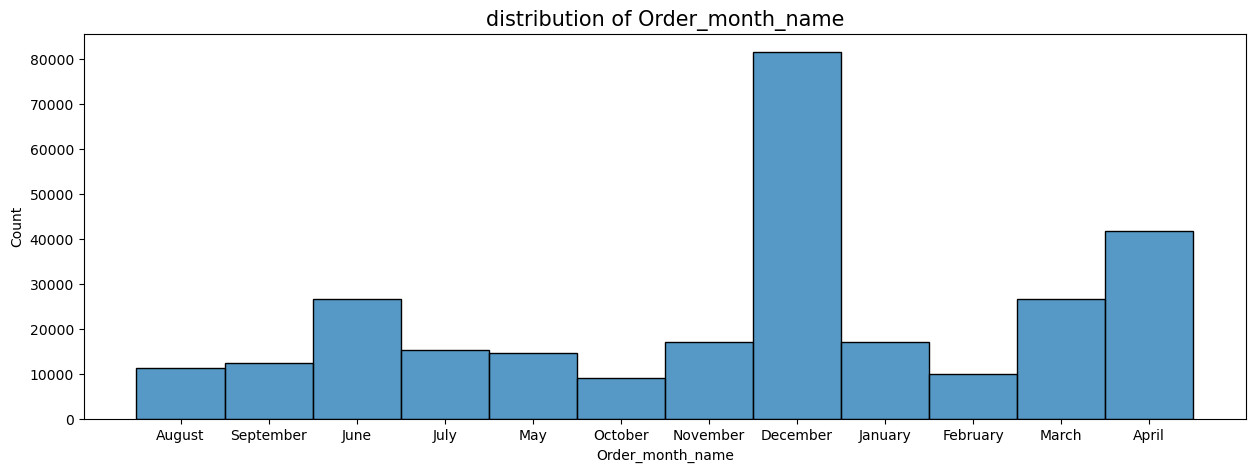

In [262]:
def hist_plot(x,data,bins):
    plt.figure(figsize=(15,5))
    sns.distplot(data[x],bins=bins);
    plt.title(f"distribution of {x}",size=15)
    
#distribution of the displ feature
hist_plot('Order_month_name',df,15)

### December generated the highest revenue and the least came from October

### NARRATION - observation from Univariate and Bivariate analysis 

 1. From the observation, south region generated the highest number of transactions which also tallies with the transaction count from the univariate analysis
 
 2. From the observation, the top five transactions by categories came from mobile phones and tablets,appliances, others, womens fashion and men's fashion. However, from the univariate analysis, the order count had mobilephones as the highest, followed by men's fashion, appliances, womem's fashion and others
 
 3. From this analysis the highest total transactions generated came from easypay whereas from the univariate analysis, the most frequently used payment method indicated cod
 
 4. From this analysis women generated more revenue than men even though the univariate analysis indicated that they had more male customers
 
 5. December has the highest revenue and highest transaction count
 
 6. In terms of customers transactions, Beebe Hortencia spent the most money on purchases, where as from the univariate analysis, Gonzalez Joel has the highest purchase count
 



In [66]:
df.columns


Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total', 'Order_year', 'Order_month',
       'Order_month_name', 'Order_quarter', 'Inception_year',
       'Inception_month', 'Inception_month_name', 'Inception_quarter',
       'State_full'],
      dtype='object')

### Multivariate Analysis

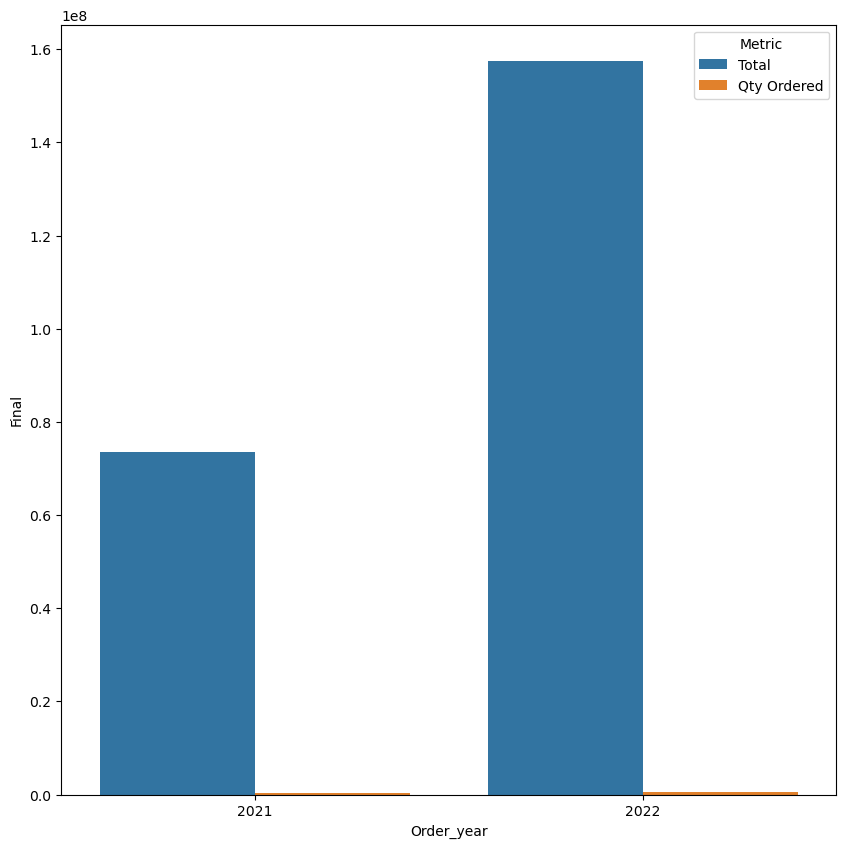

In [314]:
# A comparison of item quantity ordered and total revenue generated from inception on a monthly basis 
plt.figure(figsize=(10,10))

cat = df.groupby("Order_year")[["Total", "Qty Ordered"]].sum().reset_index()
cat = pd.melt(cat, id_vars="Order_year", var_name="Metric", value_name="Final")
sns.barplot(data=cat, x='Order_year', y="Final", hue="Metric");


### From this analysis, 2022 generated more revenue and had more orders when compared with 2021

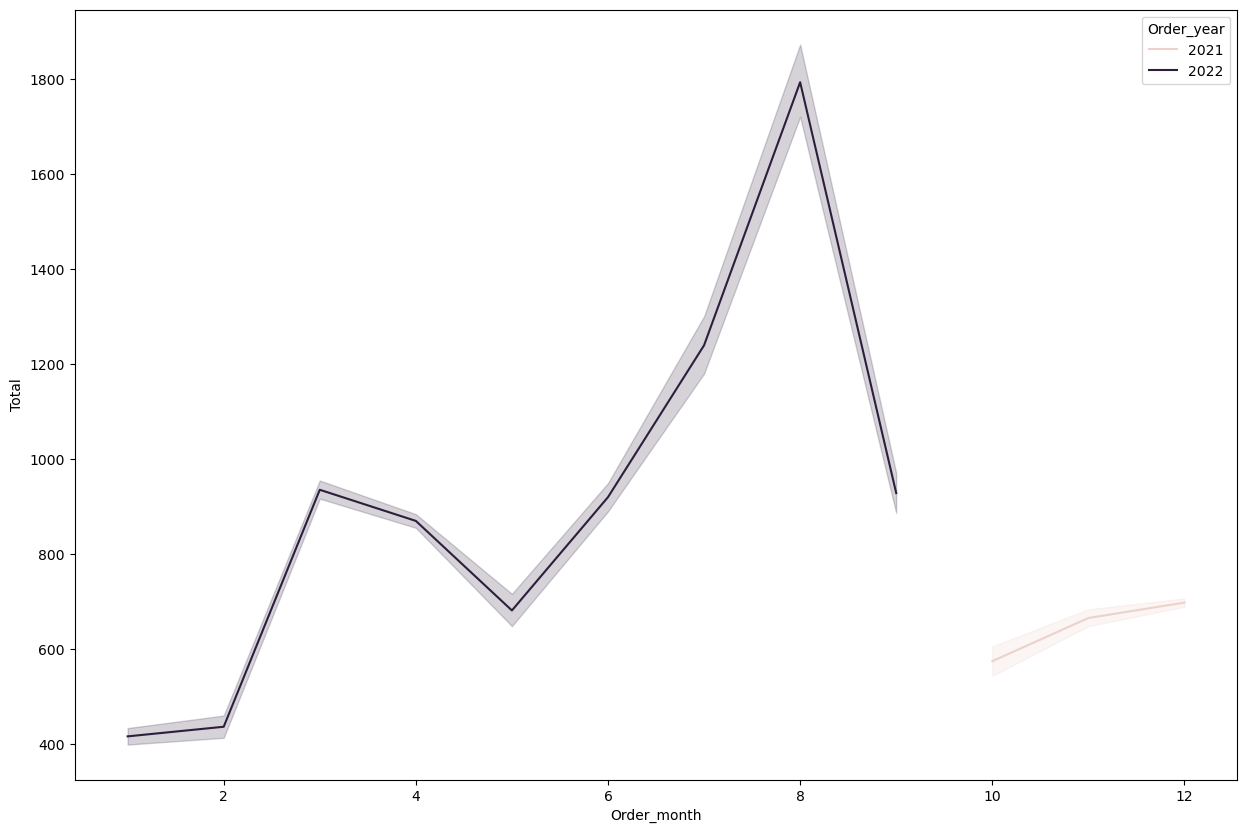

In [323]:

plt.figure(figsize=(15,10))

sns.lineplot(x="Order_month", y="Total", data=df, hue="Order_year");

In [327]:
# Using pivot table
df.pivot_table(values='Total', index='Order_year', columns='Order_month', aggfunc='sum')

Order_month,1,2,3,4,5,6,7,8,9,10,11,12
Order_year,,,,,,,,,,,,
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5232040.0,11367612.0,56934381.0
2022,7092368.0,4360963.0,24881194.0,36255361.0,10002888.0,24397970.0,18775819.0,20240703.0,11405316.0,NaN,NaN,NaN


### The data spans between Oct 2021 to Sept 2022 and the peak month value is December 2021

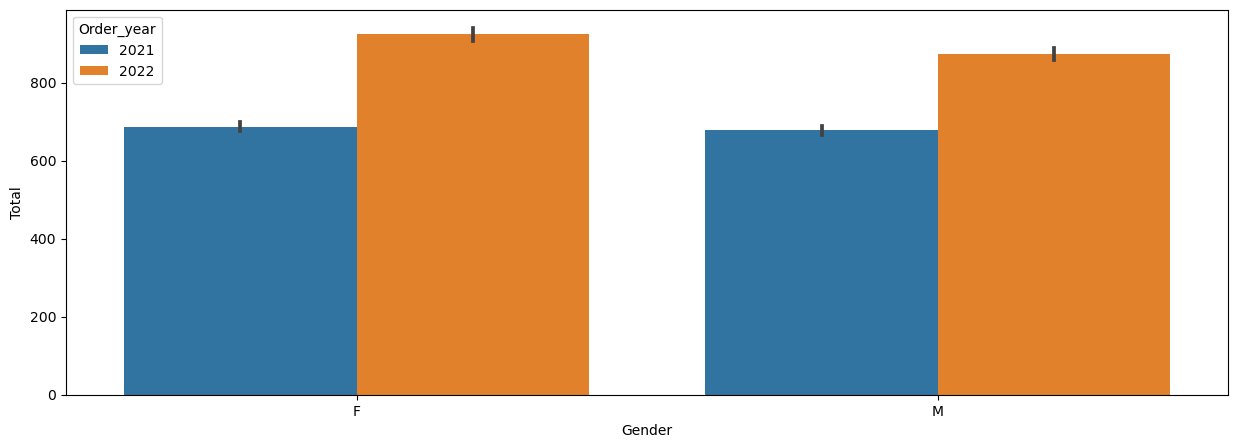

In [339]:
# Customer gender, Total and order month
plt.figure(figsize=(15,5))
sns.barplot(x="Gender", y='Total', data=df, hue="Order_year");

### Female customers brought in more revenue in 2022 than male

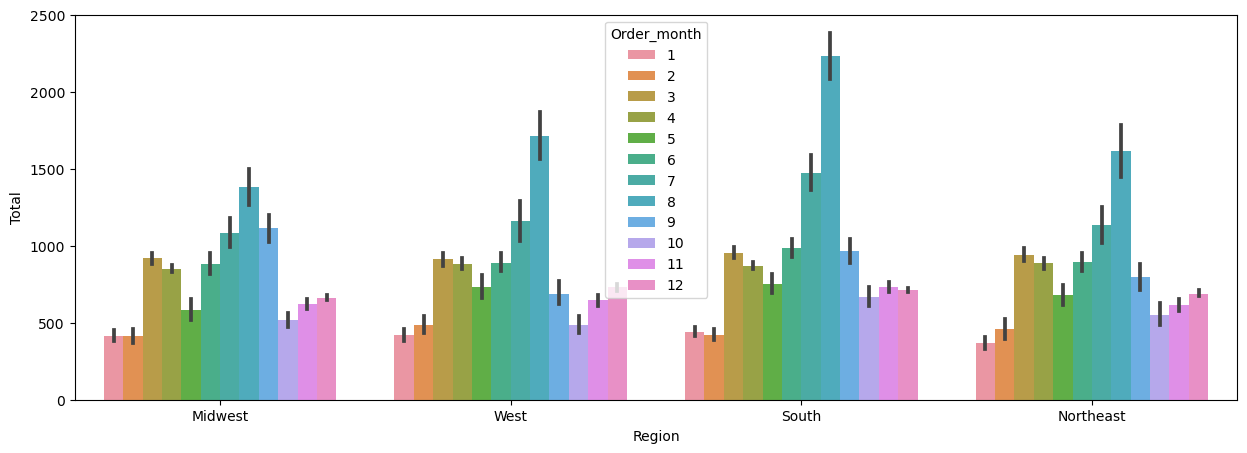

In [340]:
# Region, Total and order month
plt.figure(figsize=(15,5))
sns.barplot(x="Region", y='Total', data=df, hue="Order_month");

### All regions show that the total revenue peaked in August across all regions